In [76]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_wine, make_classification , load_diabetes , make_regression , load_iris , fetch_olivetti_faces ,load_digits
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.decomposition import PCA, FastICA, NMF
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Esercizio 3.1: Usa il dataset Iris per sperimentare diverse suddivisioni
- Testa: 80-20, 70-30, 60-40 e osserva come cambia la distribuzione delle classi

In [77]:
iris = load_iris()
X = iris.data
y = iris.target

In [78]:
test_sizes = [0.2, 0.3, 0.4]
for size in test_sizes:
    train_ratio = int((1 - size) * 100)
    test_ratio = int(size * 100)
    
    print(f"--- Suddivisione {train_ratio}-{test_ratio} ---")
    
    # Suddividi i dati in set di addestramento e test
    # 'stratify=y' assicura che le proporzioni delle classi siano mantenute
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=size, random_state=42, stratify=y
    )
    
    # Calcola la distribuzione nel set di addestramento
    unique_train, counts_train = np.unique(y_train, return_counts=True)
    dist_train = dict(zip(unique_train, counts_train))
    
    # Calcola la distribuzione nel set di test
    unique_test, counts_test = np.unique(y_test, return_counts=True)
    dist_test = dict(zip(unique_test, counts_test))
    
    print(f"Dimensioni Training Set: {X_train.shape[0]} campioni")
    print(f"Distribuzione classi (train): {dist_train}")
    
    print(f"\nDimensioni Test Set: {X_test.shape[0]} campioni")
    print(f"Distribuzione classi (test): {dist_test}")
    print("-" * 35 + "\n")

--- Suddivisione 80-20 ---
Dimensioni Training Set: 120 campioni
Distribuzione classi (train): {np.int64(0): np.int64(40), np.int64(1): np.int64(40), np.int64(2): np.int64(40)}

Dimensioni Test Set: 30 campioni
Distribuzione classi (test): {np.int64(0): np.int64(10), np.int64(1): np.int64(10), np.int64(2): np.int64(10)}
-----------------------------------

--- Suddivisione 70-30 ---
Dimensioni Training Set: 105 campioni
Distribuzione classi (train): {np.int64(0): np.int64(35), np.int64(1): np.int64(35), np.int64(2): np.int64(35)}

Dimensioni Test Set: 45 campioni
Distribuzione classi (test): {np.int64(0): np.int64(15), np.int64(1): np.int64(15), np.int64(2): np.int64(15)}
-----------------------------------

--- Suddivisione 60-40 ---
Dimensioni Training Set: 90 campioni
Distribuzione classi (train): {np.int64(0): np.int64(30), np.int64(1): np.int64(30), np.int64(2): np.int64(30)}

Dimensioni Test Set: 60 campioni
Distribuzione classi (test): {np.int64(0): np.int64(20), np.int64(1): np

# Esercizio 3.2: Applica cross-validation con diversi fold (3, 5, 10) 
- su un classificatore SVM usando il dataset Wine
- Confronta accuracy media e deviazione standard

In [79]:

# Carica il dataset Wine
X, y = load_wine(return_X_y=True)

# Inizializza il classificatore SVM
# Usiamo un kernel lineare e un random_state per la riproducibilità
clf = SVC(kernel='linear', C=1, random_state=42)

# Definisci il numero di fold da testare
k_folds = [3, 5, 10]

print("--- Confronto Accuratezza con Cross-Validation ---")

# Itera su ogni configurazione di fold
for k in k_folds:
    # Esegui la cross-validation e ottieni i punteggi di accuratezza per ogni fold
    scores = cross_val_score(clf, X, y, cv=k)
    
    # Calcola media e deviazione standard
    accuracy_media = np.mean(scores)
    dev_standard = np.std(scores)
    
    print(f"\nRisultati per k = {k} fold:")
    print(f"  Accuratezza Media: {accuracy_media:.4f}")
    print(f"  Deviazione Standard: {dev_standard:.4f}")
    print(f"  Accuratezze individuali: {[f'{s:.3f}' for s in scores]}")

--- Confronto Accuratezza con Cross-Validation ---

Risultati per k = 3 fold:
  Accuratezza Media: 0.9275
  Deviazione Standard: 0.0697
  Accuratezze individuali: ['0.833', '0.949', '1.000']

Risultati per k = 5 fold:
  Accuratezza Media: 0.9611
  Deviazione Standard: 0.0416
  Accuratezze individuali: ['0.889', '0.944', '0.972', '1.000', '1.000']

Risultati per k = 10 fold:
  Accuratezza Media: 0.9556
  Deviazione Standard: 0.0416
  Accuratezze individuali: ['0.889', '0.944', '0.889', '0.944', '0.944', '0.944', '1.000', '1.000', '1.000', '1.000']


###  Ottimizzazione Iperparametri
# Confronta GridSearchCV e RandomizedSearchCV per ottimizzare un Random Forest.
# Esercizio 3.3: Ottimizza un Random Forest usando entrambi i metodi
# Confronta tempi di esecuzione e risultati ottenuti (best_params, best_score)

In [80]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inizializza il classificatore
rfc = RandomForestClassifier(random_state=42)

In [81]:
# Definizione della griglia di parametri
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_leaf': [1, 2, 4]
}

# Inizializza e avvia GridSearchCV
# estimator = rfc modello di machin lerning da utilizzare, in questo caso RandomForestClassifier
# param_distributions=param_grid dizionario che contine gli iperparametri da testare e i loro valori
# n_iter = numero di iterazioni
#cv = 5 numero di fold per la cross validation
# verbose = controlla quanti messaggi vengono stampati durante l'esecuzione
# n_jobs=-1 usa tutti i core della CPU per velocizzare
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

start_time = time.time()
grid_search.fit(X_train, y_train)
grid_time = time.time() - start_time

# Salva i risultati
grid_best_score = grid_search.best_score_
grid_best_params = grid_search.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [82]:
# Definizione della distribuzione dei parametri
param_dist = {
    'n_estimators': randint(50, 350), # Un intero casuale tra 50 e 350
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_leaf': randint(1, 5) # Un intero casuale tra 1 e 4
}

# Inizializza e avvia RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=20, 
                                   cv=5, n_jobs=-1, verbose=1, random_state=42)

start_time = time.time()
random_search.fit(X_train, y_train)
random_time = time.time() - start_time

# Salva i risultati
random_best_score = random_search.best_score_
random_best_params = random_search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [83]:
print("--- Confronto Metodi di Ottimizzazione ---")

# Risultati per GridSearchCV
print("\n[ GridSearchCV ]  exhaustive")
print(f"  - Tempo Esecuzione: {grid_time:.2f} secondi")
print(f"  - Accuratezza Migliore: {grid_best_score:.4f}")
print(f"  - Parametri Migliori: {grid_best_params}")

# Risultati per RandomizedSearchCV
print("\n[ RandomizedSearchCV ]")
print(f"  - Tempo Esecuzione: {random_time:.2f} secondi")
print(f"  - Accuratezza Migliore: {random_best_score:.4f}")
print(f"  - Parametri Migliori: {random_best_params}")

--- Confronto Metodi di Ottimizzazione ---

[ GridSearchCV ]  exhaustive
  - Tempo Esecuzione: 1.36 secondi
  - Accuratezza Migliore: 0.9862
  - Parametri Migliori: {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 100}

[ RandomizedSearchCV ]
  - Tempo Esecuzione: 0.95 secondi
  - Accuratezza Migliore: 0.9862
  - Parametri Migliori: {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 320}


# Esercizio 4.1: Applica PCA al dataset Digits
- Riduci da 64 a 10 componenti
- Visualizza la varianza spiegata cumulativa
- Determina quante componenti servono per spiegare il 95% della varianza

In [84]:
digits = load_digits()
X = digits.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [85]:
pca = PCA()
pca.fit(X_scaled)

pca_10 = PCA(n_components=10)
X_pca_10 = pca_10.fit_transform(X_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)


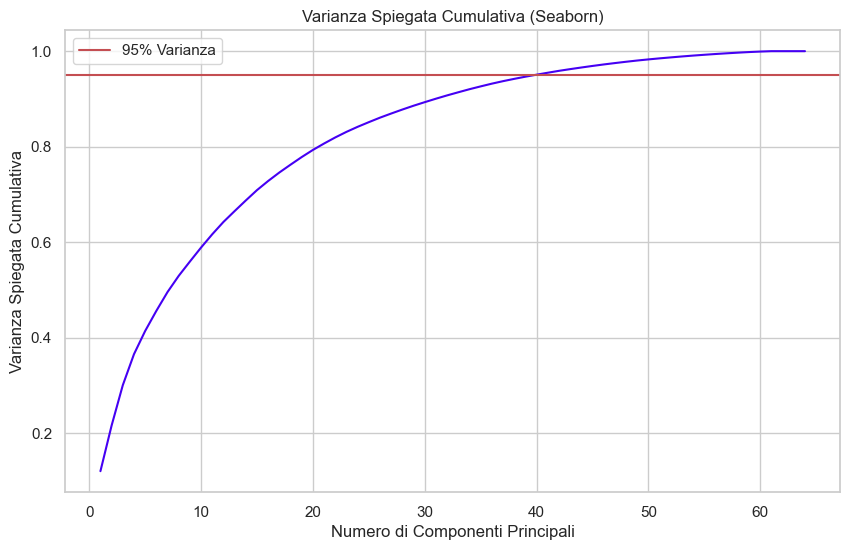

In [86]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    x=range(1, len(cumulative_variance) + 1),
    y=cumulative_variance,
    color="#4500f3"
)

plt.title('Varianza Spiegata Cumulativa (Seaborn)')
plt.xlabel('Numero di Componenti Principali')
plt.ylabel('Varianza Spiegata Cumulativa')

plt.axhline(y=0.95, color='r', linestyle='-', label='95% Varianza')
plt.legend(loc='best')
plt.show()

In [87]:
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f"\n3. Per spiegare almeno il 95% della varianza servono {n_components_95} componenti.")


3. Per spiegare almeno il 95% della varianza servono 40 componenti.


# Esercizio 4.2: Confronta PCA, FastICA e NMF 
- Sul dataset Olivetti Faces usa 10 componenti per tutti e confronta la ricostruzione

In [88]:
faces_data = fetch_olivetti_faces(shuffle=True, random_state=42)
X = faces_data.data
n_samples, n_features = X.shape
image_shape = (64, 64)
n_components = 10

In [89]:
# Funzione per visualizzare le gallerie di immagini
def plot_gallery(title, images, image_shape, n_col=5):
    n_row = np.ceil(len(images) / n_col).astype(int)
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest', vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()
    
sample_faces = X[:10]

In [90]:
# PCA
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X)
components_pca = pca.components_
reconstructed_pca = pca.inverse_transform(X_pca[:10])

# FastICA
ica = FastICA(n_components=n_components, random_state=42, max_iter=2500, tol=0.05)
X_ica = ica.fit_transform(X)
components_ica = ica.components_
reconstructed_ica = ica.inverse_transform(X_ica[:10])

# NMF
nmf = NMF(n_components=n_components, init='random', random_state=42)
W_nmf = nmf.fit_transform(X)
components_nmf = nmf.components_
reconstructed_nmf = np.dot(W_nmf[:10], components_nmf)

C:\Users\Utente\AppData\Roaming\Python\Python313\site-packages\sklearn\decomposition\_nmf.py:1728: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


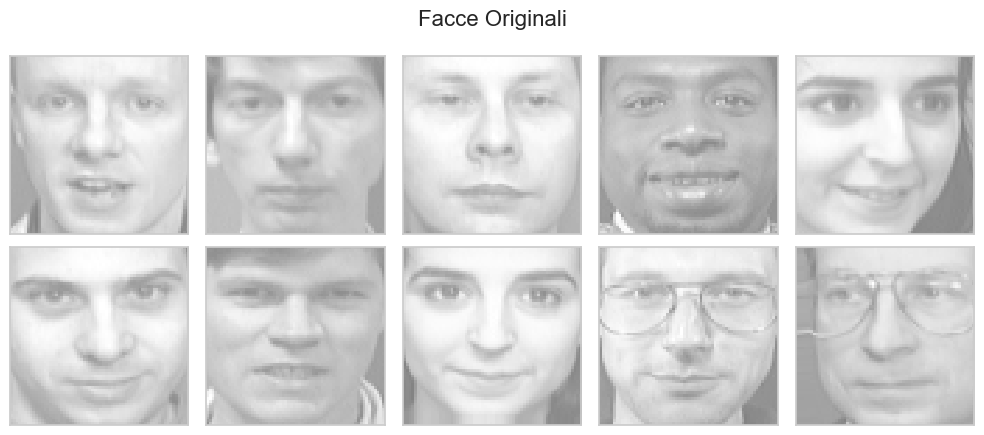

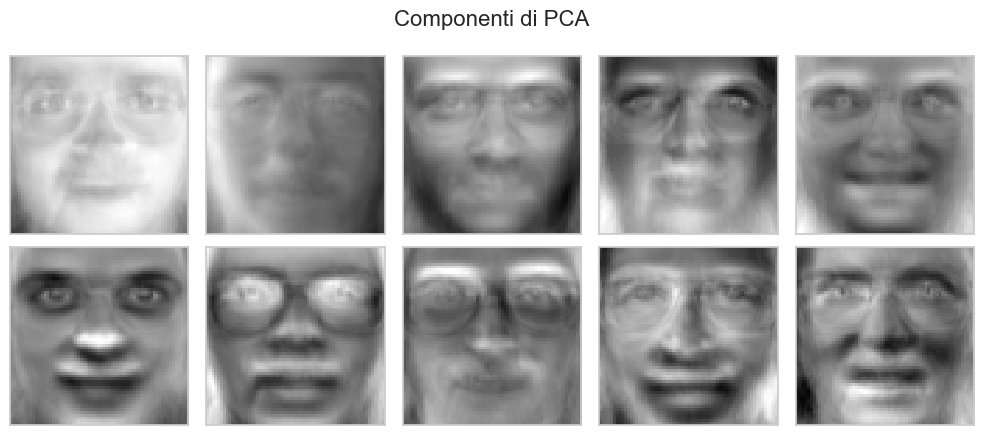

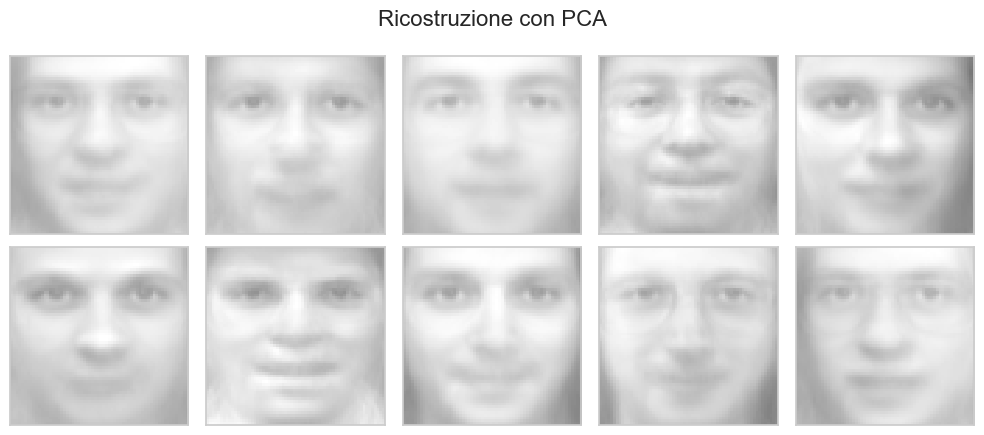

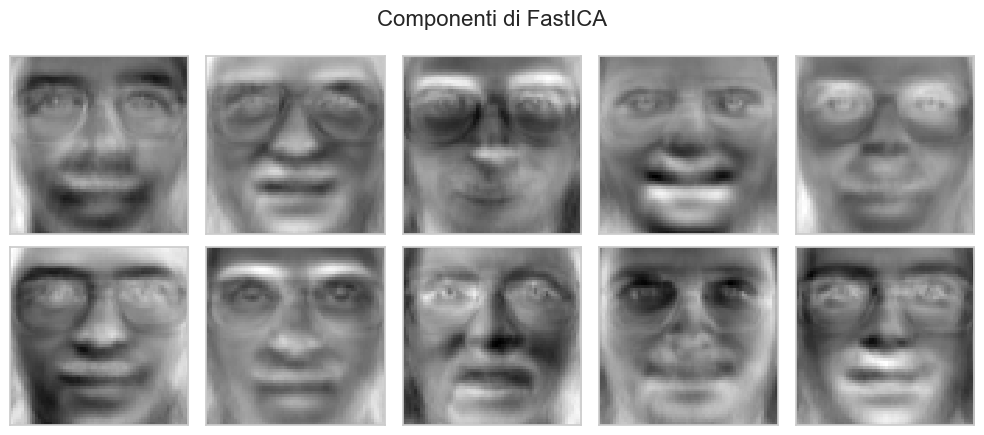

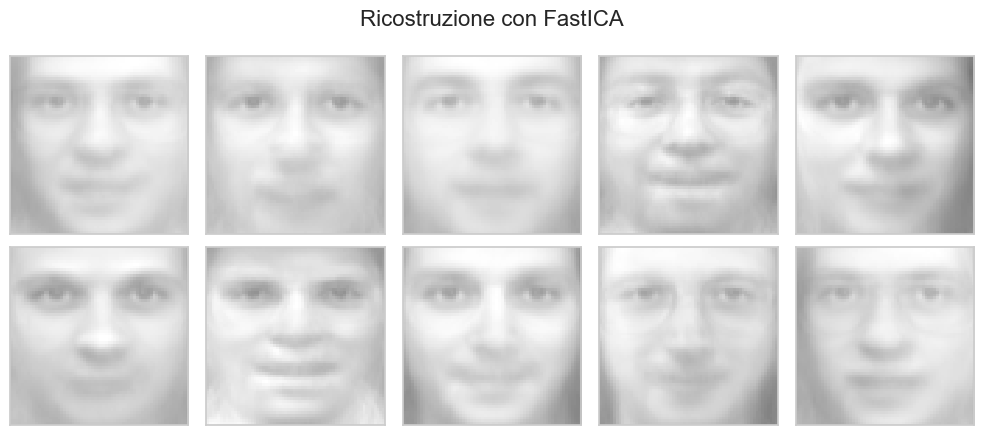

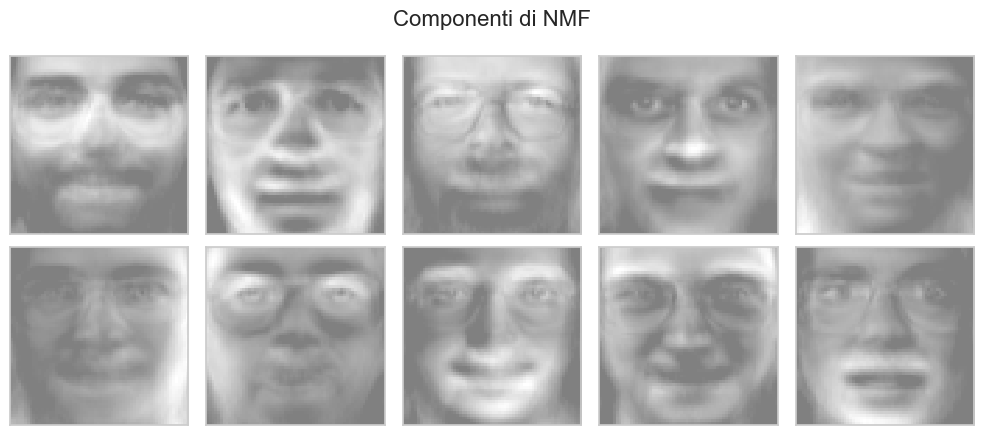

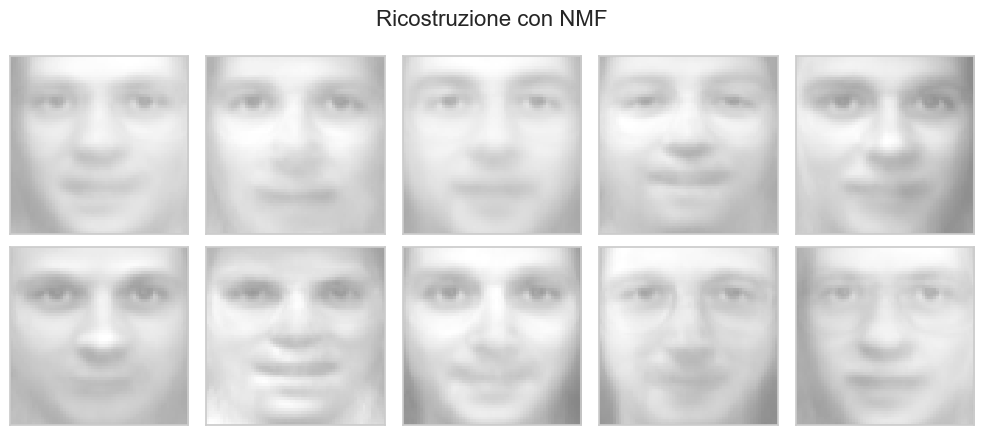

In [91]:
# Mostra le facce originali
plot_gallery("Facce Originali", sample_faces, image_shape)

# Visualizza risultati PCA
plot_gallery("Componenti di PCA", components_pca, image_shape)
plot_gallery("Ricostruzione con PCA", reconstructed_pca, image_shape)

# Visualizza risultati FastICA
plot_gallery("Componenti di FastICA", components_ica, image_shape)
plot_gallery("Ricostruzione con FastICA", reconstructed_ica, image_shape)

# Visualizza risultati NMF
plot_gallery("Componenti di NMF", components_nmf, image_shape)
plot_gallery("Ricostruzione con NMF", reconstructed_nmf, image_shape)

# Esercizio 4.3: Trova il numero ottimale di componenti PCA
- utilizzando un classificatore e cross-validation sul dataset Wine

In [92]:
wine = load_wine()
X, y = wine.data, wine.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [93]:

# Ciclo di valutazione
n_components_range = range(1, X.shape[1] + 1)
accuracies = []

for n in n_components_range:
    # Crea una pipeline che prima applica PCA e poi il classificatore
    pipeline = Pipeline([
        ('pca', PCA(n_components=n)),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])

    score = cross_val_score(pipeline, X_scaled, y, cv=5)
    accuracies.append(np.mean(score))

# Trova il numero ottimale di componenti
optimal_n = np.argmax(accuracies)
best_accuracy = np.max(accuracies)

print(f"L'accuratezza massima ({best_accuracy:.4f}) è stata ottenuta con {optimal_n} componenti.")

L'accuratezza massima (0.9889) è stata ottenuta con 10 componenti.


Numero di componenti testate: 13
Numero di accuratezze calcolate: 13


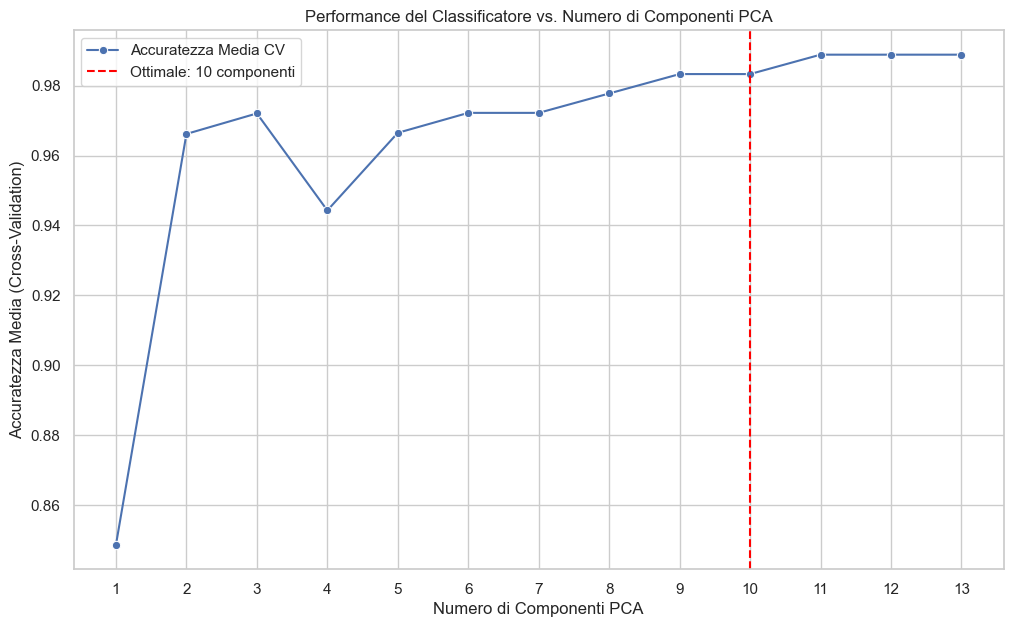

In [94]:
print(f"Numero di componenti testate: {len(list(n_components_range))}")
print(f"Numero di accuratezze calcolate: {len(accuracies)}")

plot_df = pd.DataFrame({
    'Numero di Componenti': list(n_components_range),
    'Accuratezza Media': accuracies
})

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

ax = sns.lineplot(
    data=plot_df,
    x='Numero di Componenti',
    y='Accuratezza Media',
    marker='o',
    label='Accuratezza Media CV'
)

ax.axvline(optimal_n, color='red', linestyle='--', label=f'Ottimale: {optimal_n} componenti')
plt.title('Performance del Classificatore vs. Numero di Componenti PCA')
plt.xlabel('Numero di Componenti PCA')
plt.ylabel('Accuratezza Media (Cross-Validation)')
plt.xticks(list(n_components_range))
plt.legend()
plt.show()